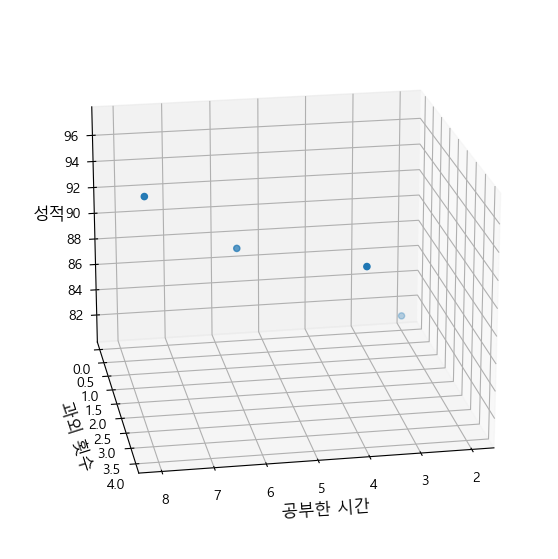

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic' 

# 마이너스 기호가 깨지지 않도록 설정합니다.
plt.rcParams['axes.unicode_minus'] = False

# 데이터 설정
x1 = np.array([2, 4, 6, 8])
x2 = np.array([0, 4, 2, 3])
y = np.array([81, 93, 91, 97])

# Figure 객체를 생성하고 크기를 설정합니다.
fig = plt.figure(figsize=(7, 7))  # 너비 7인치, 높이 7인치

# 3D 플롯을 위한 서브플롯을 생성합니다.
ax = fig.add_subplot(111, projection='3d')

# 3D 산점도를 그립니다.
ax.scatter3D(x1, x2, y)

# 각 축에 라벨을 설정합니다.
ax.set_xlabel('공부한 시간')
ax.set_ylabel('과외 횟수')
ax.set_zlabel('성적')

# 축 레이블의 글씨 크기를 조정합니다.
ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)
ax.zaxis.label.set_size(12)

# 3D 시점을 조정하여 레이블이 잘리지 않도록 합니다.
ax.view_init(elev=20, azim=80)

# 그래프를 화면에 표시합니다.
plt.show()


In [2]:
import h5py

# HDF5 파일 열기 (읽기 모드)
with h5py.File('model.hdf5', 'r') as f:
    # 파일의 모든 그룹 및 데이터셋을 출력
    def printname(name):
        print(name)

    print("File structure:")
    f.visit(printname)
    
    # # 데이터셋 읽기
    # if 'my_dataset' in f:
    #     dataset = f['my_dataset']
    #     print("\nDataset content:")
    #     print("Shape:", dataset.shape)
    #     print("Data type:", dataset.dtype)
    #     print("Data (first few elements):", dataset[:10])  # 첫 10개 요소를 출력

    # # 속성 읽기
    # if 'description' in f.attrs:
    #     description = f.attrs['description']
    #     print("\nAttributes:")
    #     print("Description:", description)


File structure:
model_weights
model_weights/dense_6
model_weights/dense_6/dense_6
model_weights/dense_6/dense_6/bias:0
model_weights/dense_6/dense_6/kernel:0
model_weights/dense_7
model_weights/dense_7/dense_7
model_weights/dense_7/dense_7/bias:0
model_weights/dense_7/dense_7/kernel:0
model_weights/dense_8
model_weights/dense_8/dense_8
model_weights/dense_8/dense_8/bias:0
model_weights/dense_8/dense_8/kernel:0
model_weights/top_level_model_weights
optimizer_weights
optimizer_weights/Adam
optimizer_weights/Adam/m
optimizer_weights/Adam/m/dense_6
optimizer_weights/Adam/m/dense_6/bias:0
optimizer_weights/Adam/m/dense_6/kernel:0
optimizer_weights/Adam/m/dense_7
optimizer_weights/Adam/m/dense_7/bias:0
optimizer_weights/Adam/m/dense_7/kernel:0
optimizer_weights/Adam/m/dense_8
optimizer_weights/Adam/m/dense_8/bias:0
optimizer_weights/Adam/m/dense_8/kernel:0
optimizer_weights/Adam/v
optimizer_weights/Adam/v/dense_6
optimizer_weights/Adam/v/dense_6/bias:0
optimizer_weights/Adam/v/dense_6/kernel

In [ ]:
df = pd.read_csv('./data/wine.csv', header=None)
# 0~11번째 열에 해당하는 속성 12rofmf X로, 13번째 열을 y로 정하겠음 
X = df.iloc[:,0:12]
y = df.iloc[:,12]

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True)

model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 0.8 x 0.25 = 0.2
# 검증셋은 model.fit()안에 validation_split 이라는 옵션을 주면 만들어짐. 
history = model.fit(x_train, y_train, epochs=50, batch_size=500,validation_split=0.25)

score = model.evaluate(x_test, y_test)
print('Test accuracy', score[1])